## Phillips Curve: An Indian Economy Analysis (1991-2024)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import linregress
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

## Loading and merging the data

In [2]:
df_inf = pd.read_csv('India-Inflation-Rate-Consumer-Price-Index.csv')
df_inf.head()

,Year,Inflation Rate(%)
0,1991,13.87
1,1992,11.79
2,1993,6.33
3,1994,10.25
4,1995,10.22


In [3]:
df_inf = df_inf.set_index('Year')
df_inf.head()

,Inflation Rate(%)
Year,
1991,13.87
1992,11.79
1993,6.33
1994,10.25
1995,10.22


In [4]:
df_un = pd.read_csv('India-Unemployment-Rate.csv')
df_un.head()

,Year,Unemployment Rate(%)
0,1991,7.72
1,1992,7.73
2,1993,7.75
3,1994,7.65
4,1995,7.61


In [5]:
df_un = df_un.set_index('Year ')
df_un.head()

,Unemployment Rate(%)
Year,
1991,7.72
1992,7.73
1993,7.75
1994,7.65
1995,7.61


In [6]:
# Merging the data
df = pd.merge(df_un, df_inf, left_index=True, right_index=True)
df.head()

,Unemployment Rate(%),Inflation Rate(%)
Year,,
1991,7.72,13.87
1992,7.73,11.79
1993,7.75,6.33
1994,7.65,10.25
1995,7.61,10.22


In [7]:
df.tail()

,Unemployment Rate(%),Inflation Rate(%)
Year,,
2020,7.86,6.62
2021,6.38,5.13
2022,4.82,6.70
2023,4.17,5.65
2024,4.20,4.95


In [8]:
df.shape

(34, 2)

In [9]:
df.dtypes

Unemployment Rate(%)    float64
Inflation Rate(%)       float64
dtype: object

In [10]:
df.index.dtype

dtype('int64')

In [11]:
df.describe()

,Unemployment Rate(%),Inflation Rate(%)
count,34.000000,34.000000
mean,7.292941,7.023529
std,0.964945,3.059777
min,4.170000,3.330000
25%,7.570000,4.392500
50%,7.630000,6.350000
75%,7.667500,9.355000
max,7.860000,13.870000


In [12]:
# Check for missing values
print(f"\nMissing values:\n{df.isnull().sum()}")


Missing values:
Unemployment Rate(%)    0
Inflation Rate(%)       0
dtype: int64


In [13]:
# Renaming the columns:
df.rename(columns={'Inflation Rate(%)': 'Inflation_Rate','Unemployment Rate(%)': 'Unemployment_Rate'}, inplace=True)
df.head()

,Unemployment_Rate,Inflation_Rate
Year,,
1991,7.72,13.87
1992,7.73,11.79
1993,7.75,6.33
1994,7.65,10.25
1995,7.61,10.22


## Data Visualization

**_Plotting the Line Graphs for both Inflation and Unemployment over the years_**

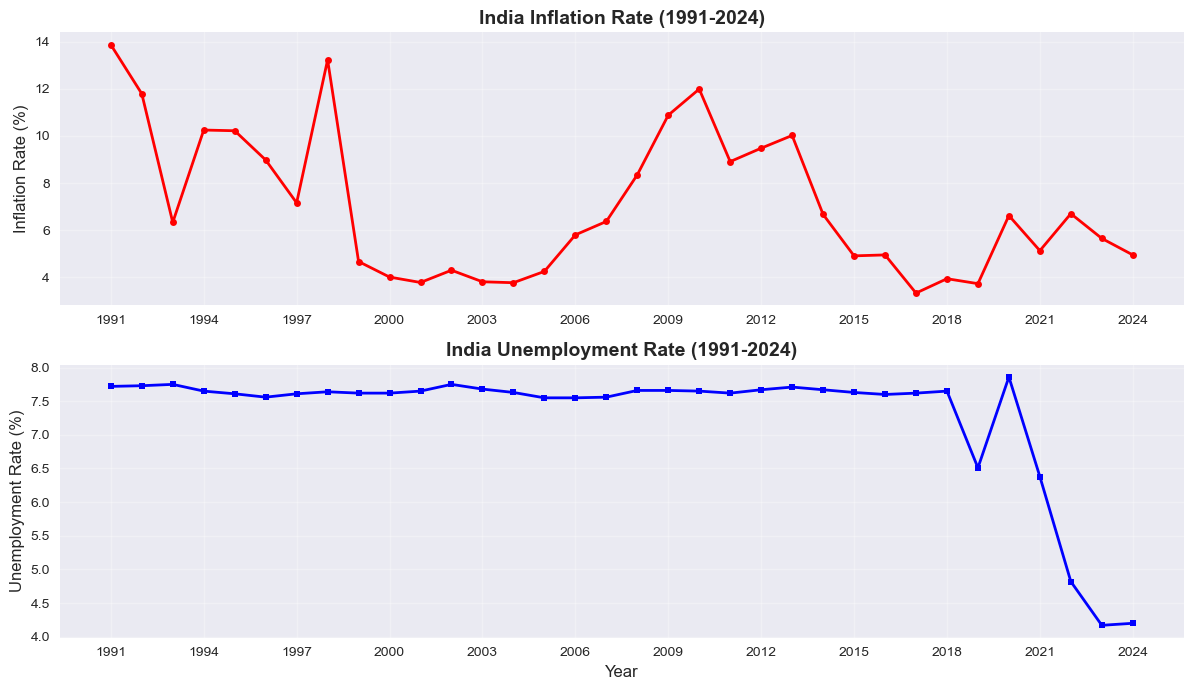

In [14]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols=1, figsize=(12, 7))
tick_years = df.index[::3]

# Inflation over time
ax1.plot(df.index, df['Inflation_Rate'], marker='o',label='Inflation Rate', linewidth=2, markersize=5, color='red')
ax1.set_title('India Inflation Rate (1991-2024)', fontsize=14, fontweight='bold')
ax1.set_ylabel('Inflation Rate (%)', fontsize=12)
ax1.set_xticks(tick_years)
ax1.grid(True, alpha=0.3)

# Unemployment over time
ax2.plot(df.index, df['Unemployment_Rate'],label='Unemployment Rate', marker='s', linewidth=2, markersize=4, color='blue')
ax2.set_title('India Unemployment Rate (1991-2024)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Year', fontsize=12)
ax2.set_ylabel('Unemployment Rate (%)', fontsize=12)
ax2.set_xticks(tick_years)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

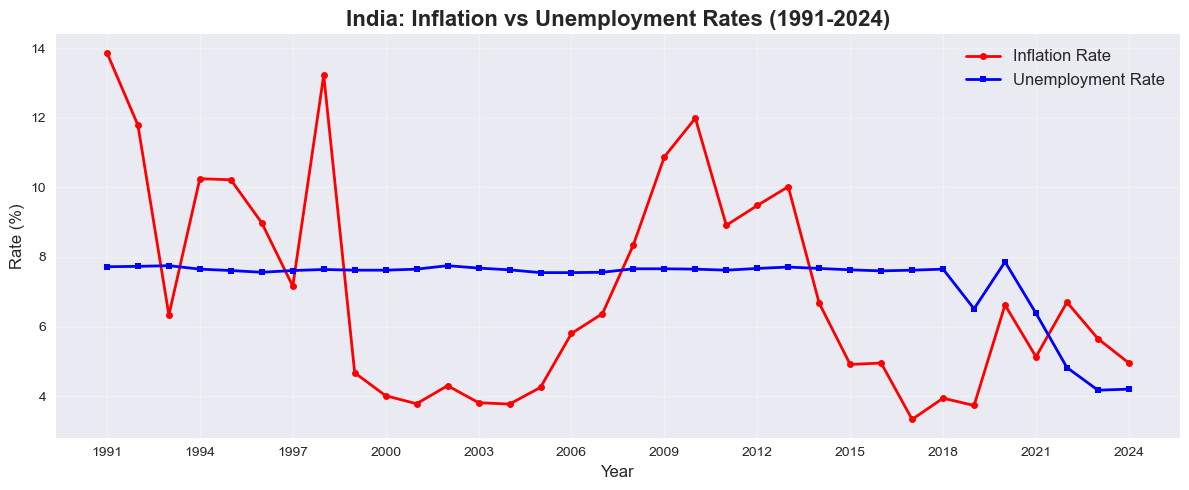

In [15]:
# Combined Line graph:
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['Inflation_Rate'], marker='o', linewidth=2,markersize=5, label='Inflation Rate', color='red')
plt.plot(df.index, df['Unemployment_Rate'], marker='s', linewidth=2,markersize=4, label='Unemployment Rate', color='blue')
plt.title('India: Inflation vs Unemployment Rates (1991-2024)', fontsize=16, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Rate (%)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xticks(df.index[::3])
plt.tight_layout()
plt.show()

**_Plotting the Regression plot using seaborn._**

Correlation coefficient(r): 0.21
P-value: 0.24


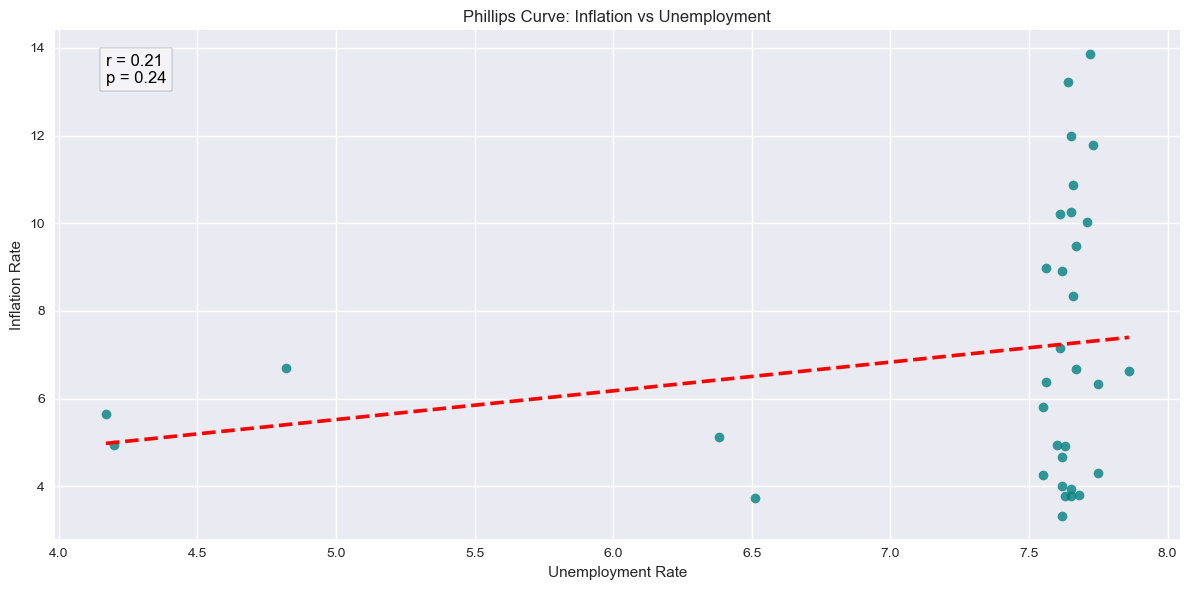

In [16]:
plt.figure(figsize=(12, 6))
sns.regplot(x='Unemployment_Rate', y='Inflation_Rate', data=df, ci=None,color='teal', line_kws={"color": "red", 'linestyle':'--'})
plt.title("Phillips Curve: Inflation vs Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")

#calculating r and p value:
slope, intercept, r, p, stderr = linregress(df['Unemployment_Rate'], df['Inflation_Rate'])
print(f"Correlation coefficient(r): {r:.2f}")
print(f'P-value: {p:.2f}')

# Add r and p-value at the top left
plt.text(
    df['Unemployment_Rate'].min(),
    df['Inflation_Rate'].max(),
    f"r = {r:.2f}\np = {p:.2f}",
    fontsize=12,
    color='black',
    ha='left',
    va='top',
    bbox=dict(facecolor='white', alpha=0.5)
)

plt.tight_layout()
plt.show()

**_In the long run, the Regression plot shows a positive correlation between inflation and unemployment, which contradicts the traditional Phillips Curve theory._**
**milton friedman of keynesian school opposed**

## Plotting short-term Phillips Curve, for different time periods  

### Periods:
* 1991–1999 (Reforms + Liberalization phase)
* 2000–2008 (Pre-Global Financial Crisis )
* 2009–2016 (Post-GFC + pre-GST era)
* 2017–2024 (GST + Pandemic + Post-Pandemic)

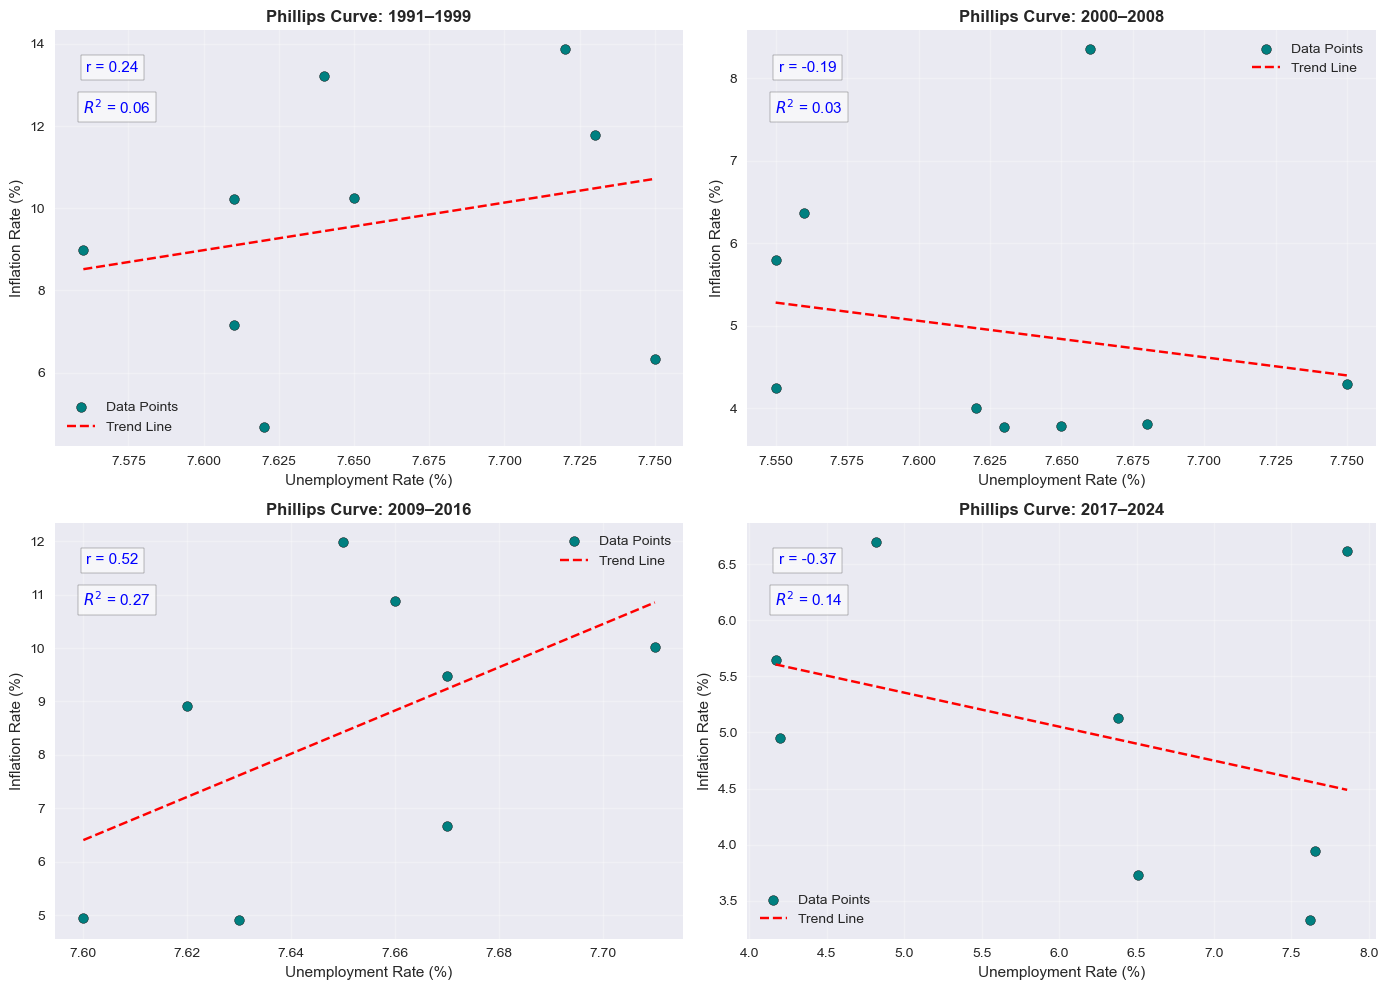

In [17]:
periods = {
    '1991–1999': (1991, 1999),
    '2000–2008': (2000, 2008),
    '2009–2016': (2009, 2016),
    '2017–2024': (2017, 2024)
}

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

# Plotting for each time period
for i, (title, (start, end)) in enumerate(periods.items()):
    sub_df = df[(df.index >= start) & (df.index <= end)]

    x = sub_df['Unemployment_Rate']
    y = sub_df['Inflation_Rate']

    # Plotting scatter
    axes[i].scatter(x, y, color='teal', edgecolors='black', label='Data Points')

    # Linear regression line
    if len(x) >= 2:
        slope, intercept, r_value, _, _ = linregress(x, y)
        x_vals = np.linspace(x.min(), x.max(), 100)
        y_vals = intercept + slope * x_vals
        axes[i].plot(x_vals, y_vals, color='red', linestyle='--', label='Trend Line')

        
        # Annotate R squared
        r_squared = r_value ** 2
        r2_text = f"$R^2$ = {r_squared:.2f}"
        axes[i].text(0.045, 0.8, r2_text, transform=axes[i].transAxes,
                     fontsize=11, color='blue', bbox=dict(facecolor='white', alpha=0.6))

        # Annotate correlation
        corr_text = f"r = {r_value:.2f}"
        axes[i].text(0.05, 0.9, corr_text, transform=axes[i].transAxes,
                     fontsize=11, color='blue', bbox=dict(facecolor='white', alpha=0.6))
    
    # Titles and labels
    axes[i].set_title(f"Phillips Curve: {title}", fontsize=12, fontweight='bold')
    axes[i].set_xlabel("Unemployment Rate (%)")
    axes[i].set_ylabel("Inflation Rate (%)")
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.savefig('short term phillips curve.png')
plt.show()

* 1991-1999: This period shows a moderate positive correlation, which actually contradicts the traditional Phillips curve theory. This suggests the economy experienced stagflation-like conditions where both inflation and unemployment moved together.
* 2000-2008: This period displays a weak inverse relationship closer to traditional Phillips curve theory.
* 2009-2016: Strong positive correlation during this period, completely opposite to Phillips curve theory. Both inflation and unemployment rose together, reaching unemployment levels up to 7.7% and inflation up to 12%.
* 2017-2024: The most recent period shows the strongest inverse relationship, most closely resembling the traditional Phillips curve. 

## Bar chart comparing average inflation and unemployment rates across four periods in India

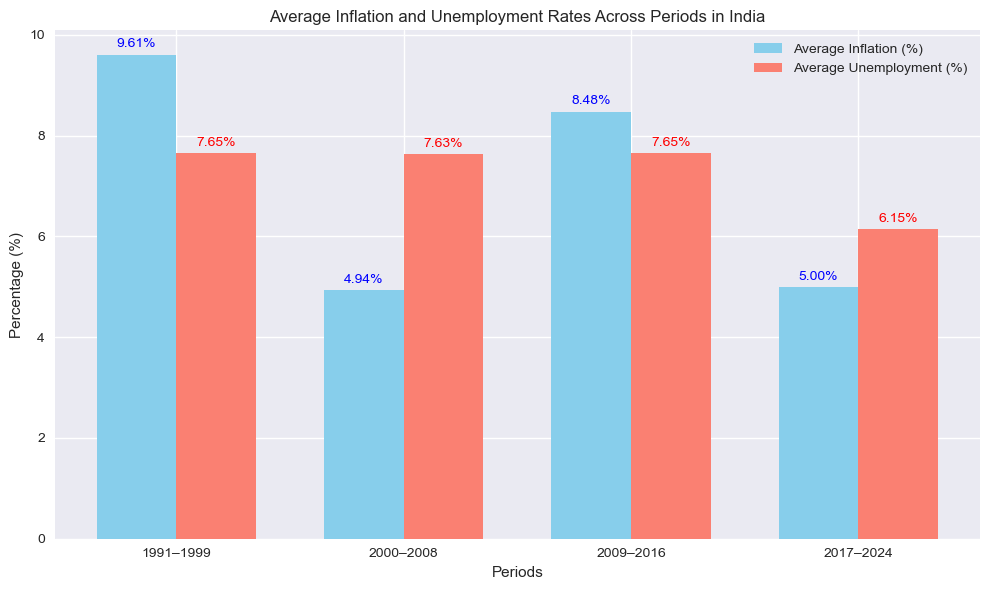

In [18]:
periods = ['1991–1999', '2000–2008', '2009–2016', '2017–2024']
avg_inflation = [9.61, 4.94, 8.48, 5.00]       # Average inflation percentages
avg_unemployment = [7.65, 7.63, 7.65, 6.15]    # Average unemployment percentages

bar_width = 0.35
x = np.arange(len(periods))

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars
bars1 = ax.bar(x - bar_width/2, avg_inflation, width=bar_width, label='Average Inflation (%)', color='skyblue')
bars2 = ax.bar(x + bar_width/2, avg_unemployment, width=bar_width, label='Average Unemployment (%)', color='salmon')

# Labeling bars with values
for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='blue')

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}%',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # vertical offset
                textcoords='offset points',
                ha='center', va='bottom', fontsize=10, color='red')

# Aesthetics
ax.set_xlabel('Periods')
ax.set_ylabel('Percentage (%)')
ax.set_title('Average Inflation and Unemployment Rates Across Periods in India')
ax.set_xticks(x)
ax.set_xticklabels(periods)
ax.legend()
plt.tight_layout()
plt.savefig('Average Inflation and Unemployment rates across four periods in India.png')
plt.show()

## Estimating NAIRU:

**_Estimate the NAIRU — the unemployment rate at which inflation is stable (i.e., inflation doesn’t accelerate or decelerate)._**

Using simple regression of change in inflation on lagged unemployment method:\
The NAIRU is typically estimated from the following equation:\
ΔInflation(t) =α+β×(Unemployment(t−1))+εt 
 
or, more formally, as:

ΔInflation(t) = intercept + slope × (Lagged Unemployment) + errorΔInflation(t)

In [19]:
#calculating change in inflation:
df_1 = df.copy()
df_1['Inflation_lag'] = df['Inflation_Rate'].shift(1)
df_1['Inflation_change'] = df_1['Inflation_Rate'].diff()
df_1['Unemployment_Lag'] = df_1['Unemployment_Rate'].shift(1)
df_1.dropna(inplace=True)
df_1.head()

,Unemployment_Rate,Inflation_Rate,Inflation_lag,Inflation_change,Unemployment_Lag
Year,,,,,
1992,7.73,11.79,13.87,-2.08,7.72
1993,7.75,6.33,11.79,-5.46,7.73
1994,7.65,10.25,6.33,3.92,7.75
1995,7.61,10.22,10.25,-0.03,7.65
1996,7.56,8.98,10.22,-1.24,7.61


In [20]:
from sklearn.linear_model import LinearRegression
X = df_1[['Unemployment_Lag']].values
Y = df_1['Inflation_change'].values

model = LinearRegression()
model.fit(X, Y)

intercept = model.intercept_
slope = model.coef_[0]
r_squared = model.score(X, Y)

In [21]:
# By definition: At NAIRU, change in inflation is zero => 0 = intercept + slope * NAIRU
nairu = -intercept / slope
print(f'Intercept: {intercept:.2f}')
print(f'Slope: {slope:.2f}')
print(f'R squared: {r_squared:.3f}')
print(f'Estimated NAIRU: {nairu:.2f}%')

Intercept: 0.88
Slope: -0.16
R squared: 0.002
Estimated NAIRU: 5.65%


## Plotting NAIRU:

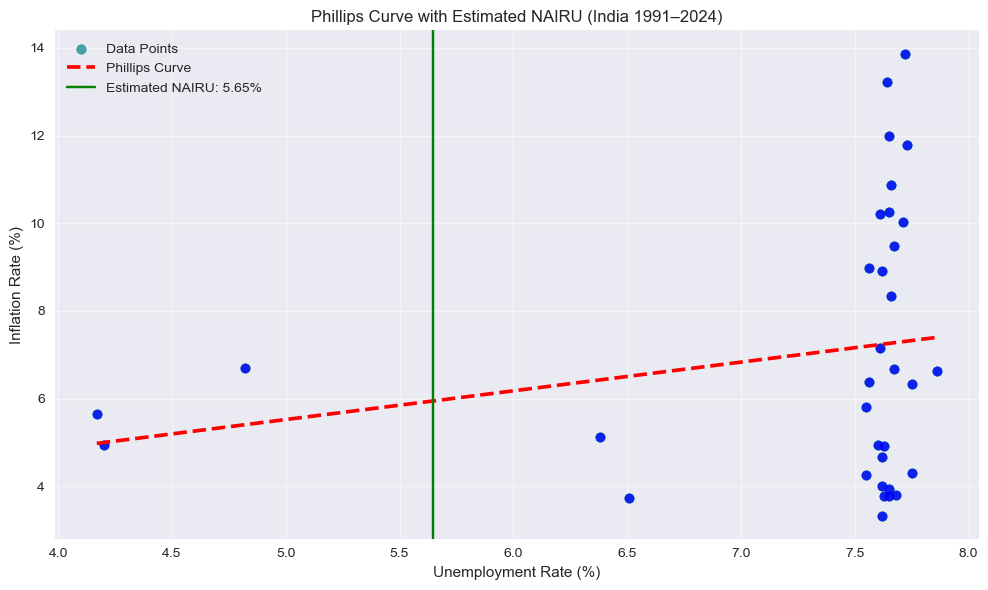

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Unemployment_Rate'], df['Inflation_Rate'], color='teal', alpha=0.7, label='Data Points')

# Plot Phillips Curve:
sns.regplot(x='Unemployment_Rate',
            y='Inflation_Rate',
            data=df, ci=None,
            color='blue',
            line_kws={"color": "red", 'linestyle':'--', 'label':'Phillips Curve'})
plt.title("Phillips Curve: Inflation vs Unemployment")
plt.xlabel("Unemployment Rate")
plt.ylabel("Inflation Rate")

# NAIRU as a vertical line
plt.axvline(nairu, color='green', linestyle='-', label=f'Estimated NAIRU: {nairu:.2f}%')

plt.title('Phillips Curve with Estimated NAIRU (India 1991–2024)')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Inflation Rate (%)')
plt.legend()
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()

**_Using Expectations-Augmented Phillips Curve: Δπt=α−β(ut−u∗)+εt: \
Where: \
• 𝜋𝑡𝑒 represents expected inflation \
• 𝑢𝑖∗ represents the natural rate of unemployment_** 

In [23]:
A = df_1[['Inflation_lag', 'Unemployment_Rate']].values
B = df_1['Inflation_Rate'].values
model2 = LinearRegression().fit(A, B)

alpha = model2.intercept_
gamma, beta = model2.coef_

mean_inflation = df_1['Inflation_Rate'].mean()

nairu = -(alpha + (gamma - 1)*mean_inflation) / beta

print(f"Estimated NAIRU (Expectations-Augmented): {nairu:.2f}%")

Estimated NAIRU (Expectations-Augmented): 7.85%


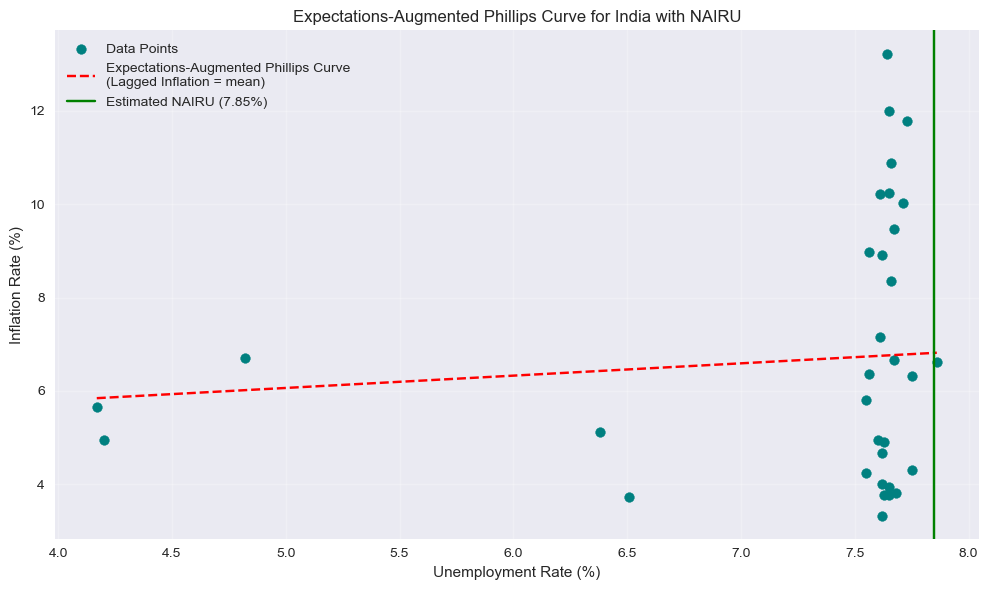

In [24]:
plt.figure(figsize=(10, 6))

# Scatter plot: observed data points
plt.scatter(df_1['Unemployment_Rate'], df_1['Inflation_Rate'],
            color='teal', label='Data Points')

# Phillips Curve (regression line, holding Lagged_Inflation at mean)
x_vals = np.linspace(df_1['Unemployment_Rate'].min(), df_1['Unemployment_Rate'].max(), 200)
# Use mean lagged inflation for the fitted line
y_vals = model2.intercept_ + model2.coef_[0]*mean_inflation + model2.coef_[1]*x_vals
plt.plot(x_vals, y_vals, 'r--', label='Expectations-Augmented Phillips Curve\n(Lagged Inflation = mean)')

# Long-run Phillips Curve: vertical line at NAIRU
plt.axvline(nairu, color='green', linestyle='-', label=f'Estimated NAIRU ({nairu:.2f}%)')

# Labels and aesthetics
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Inflation Rate (%)")
plt.title("Expectations-Augmented Phillips Curve for India with NAIRU")
plt.legend()
plt.grid(alpha=0.25)
plt.tight_layout()
plt.show()